In [1]:
from src.SynthSeg import SynthSeg
from src.Labels import Labels
from src.ABCD import ABCD
from src.StatisticalAnalysis import StatisticalAnalysis
import pandas as pd
import ggseg

#### Labels

In [4]:
labels = Labels().depr_df
labels.value_counts()

0    1485
1     366
Name: depress_dsm5, dtype: int64

#### Subset Datasets

SynthSeg (subset)

In [6]:
synthseg = SynthSeg(
    subjects=labels.index,
    run_qc=True,
    run_qc_min_score=0.65,
    run_qc_max_failed_regions=1,
)

synthseg.df.shape

(1782, 101)

In [7]:
synthseg.qc_df.shape

(1430, 101)

In [8]:
1782 - 1430

352

# Depression

## SynthSeg depressed vs control

In [9]:
# Create overall df
synthseg_with_labels = synthseg.df.join(labels)

In [10]:
synthseg_conditions = StatisticalAnalysis(
    synthseg.df[synthseg_with_labels["depress_dsm5"] == 0],
    synthseg.df[synthseg_with_labels["depress_dsm5"] == 1],
    ind=True,
)
synthseg_sig_vols, synthseg_all_stats = synthseg_conditions.compare()

synthseg_sig_vols

,feature,p_value
4,ctx-rh-postcentral,0.003214
3,ctx-lh-postcentral,0.007333
6,ctx-rh-supramarginal,0.020202
2,right cerebellum white matter,0.027419
5,ctx-rh-precentral,0.029681
0,left caudate,0.034681
1,left hippocampus,0.048953


In [11]:
# Actual volume sizes
for f in synthseg_sig_vols["feature"]:
    print("ROI:", f)
    print(
        "Control:",
        round(synthseg.df[synthseg_with_labels["depress_dsm5"] == 0][f].mean()),
    )
    print(
        "Depressed:",
        round(synthseg.df[synthseg_with_labels["depress_dsm5"] == 1][f].mean()),
    )
    print()

ROI: ctx-rh-postcentral
Control: 8662
Depressed: 8411

ROI: ctx-lh-postcentral
Control: 8468
Depressed: 8243

ROI: ctx-rh-supramarginal
Control: 9845
Depressed: 9649

ROI: right cerebellum white matter
Control: 13244
Depressed: 13020

ROI: ctx-rh-precentral
Control: 10467
Depressed: 10248

ROI: left caudate
Control: 4288
Depressed: 4223

ROI: left hippocampus
Control: 4004
Depressed: 3962



/nadata/cnl/home/mwagner/projects/SynthSeg/abcd-code/analysis/src/StatisticalAnalysis.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset_1["dataset"] = self.dataset_names[0]
/nadata/cnl/home/mwagner/projects/SynthSeg/abcd-code/analysis/src/StatisticalAnalysis.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset_2["dataset"] = self.dataset_names[1]
/nadata/cnl/home/mwagner/projects/SynthSeg/abcd-code/analysis/src/StatisticalAnalysis.py:143: SettingWithCopyWarning: 
A value is tr

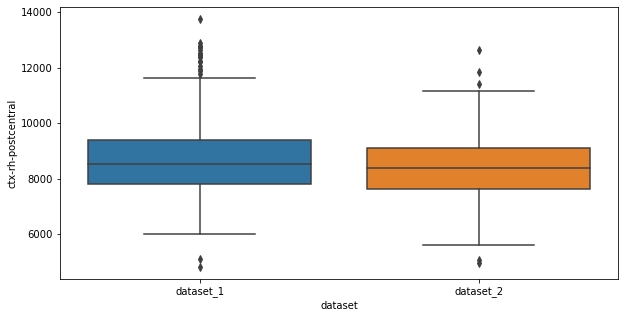

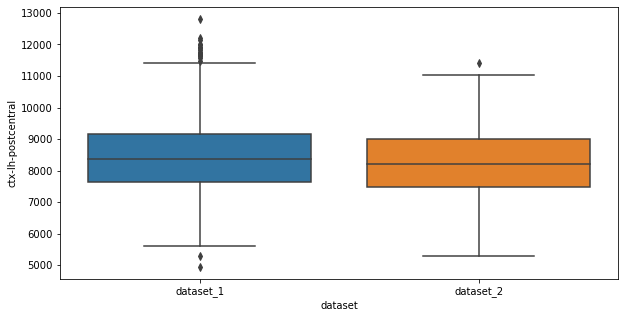

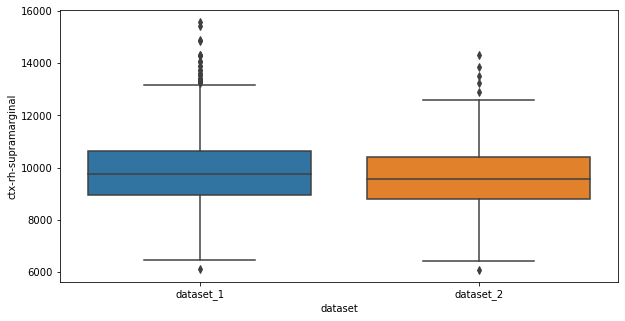

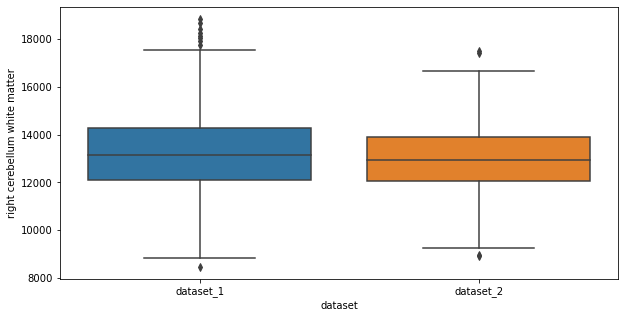

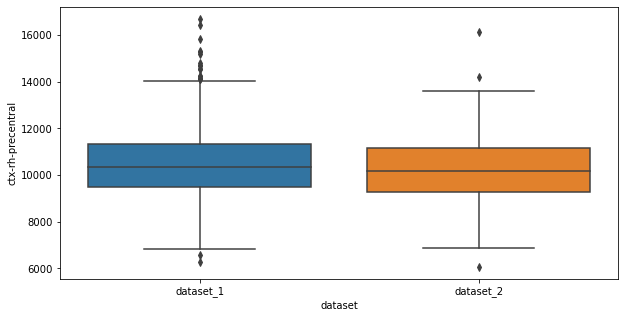

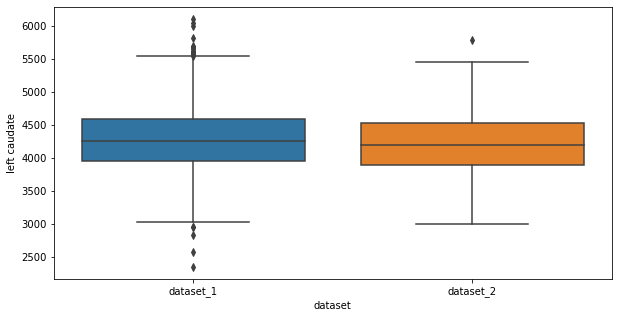

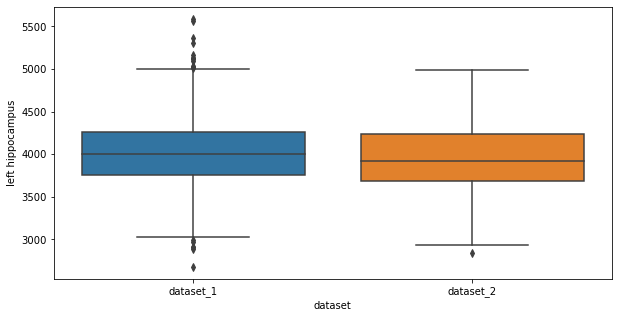

In [12]:
for f in synthseg_sig_vols["feature"]:
    synthseg_conditions.plot_feat(f)

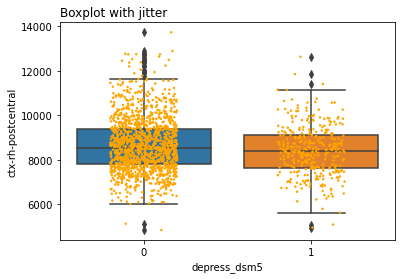

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# add stripplot
ax = sns.stripplot(
    x="depress_dsm5",
    y="ctx-rh-postcentral",
    data=synthseg_with_labels,
    color="orange",
    jitter=0.2,
    size=2.5,
)

# boxplot
ax = sns.boxplot(x="depress_dsm5", y="ctx-rh-postcentral", data=synthseg_with_labels)

# add title
plt.title("Boxplot with jitter", loc="left")

# show the graph
plt.show()

In [14]:
synthseg.df[synthseg_with_labels["depress_dsm5"] == 0]["ctx-rh-postcentral"].mean()

8661.901494051786

### Visualizations

In [15]:
synthseg_to_ggseg = {
    "ctx-rh-postcentral": "postcentral_right",
    "ctx-lh-postcentral": "postcentral_left",
    "ctx-rh-supramarginal": "supramarginal_right",
    "right cerebellum white matter": "Cerebellum-White-Matter",
    "ctx-rh-precentral": "precentral_right",
    "left caudate": "Left-Caudate",
    "left hippocampus": "Left-Hippocampus",
    "brain-stem": "Brain-Stem",
    "right ventral DC": "Right-VentralDC",
    "left cerebellum white matter": "Cerebellum-White-Matter",
    "ctx-rh-precentral": "precentral_right",
    "left cerebral cortex": "Cerebellum-Cortex",
}

In [16]:
# change names to match ggseg
data = {}

for f, p in zip(synthseg_sig_vols["feature"], synthseg_sig_vols["p_value"]):
    data[synthseg_to_ggseg[f]] = p

data["precentral_right"] = 0.04957708186675222

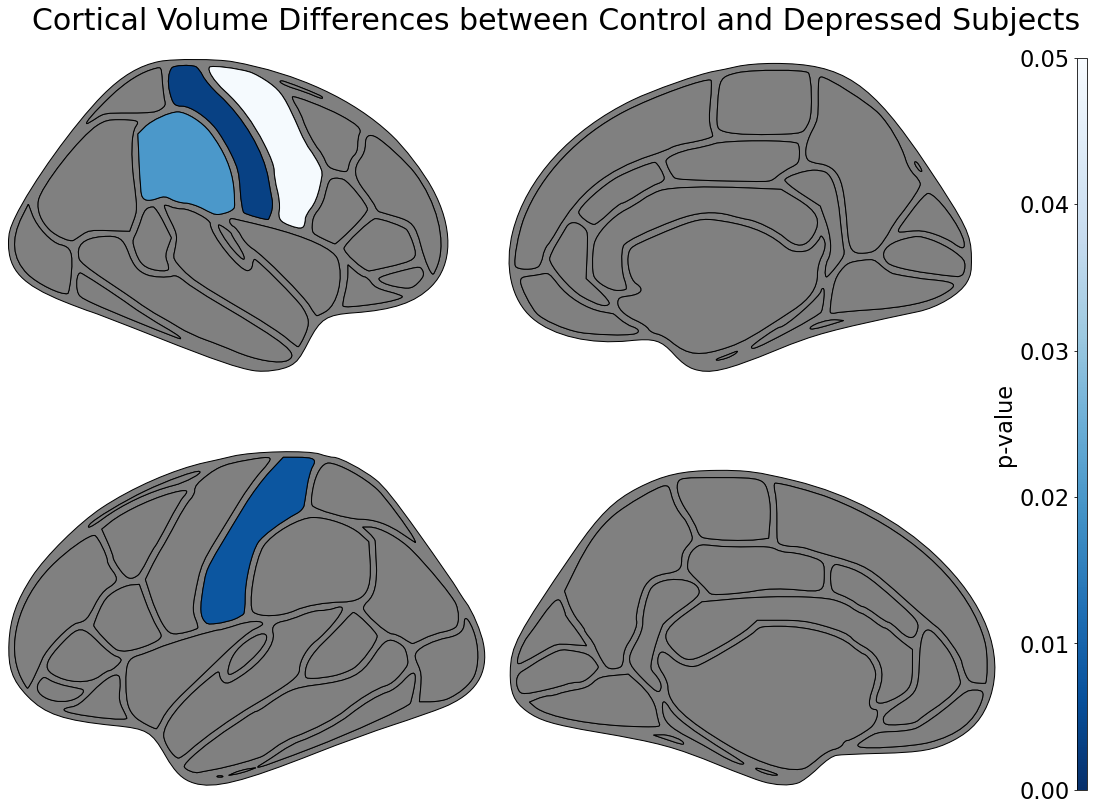

In [17]:
import ggseg

ggseg.plot_dk(
    data,
    cmap="Blues_r",
    figsize=(15, 15),
    background="w",
    edgecolor="k",
    bordercolor="gray",
    ylabel="p-value",
    title="Cortical Volume Differences between Control and Depressed Subjects",
    vminmax=[0, 0.05],
    fontsize=30,
)

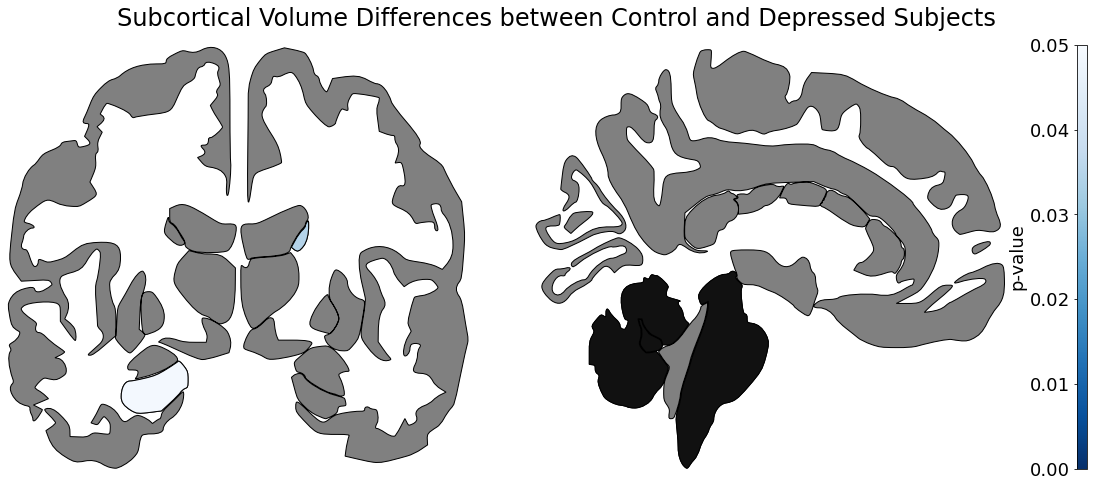

In [18]:
ggseg.plot_aseg(
    data,
    cmap="Blues_r",
    figsize=(15, 15),
    background="w",
    edgecolor="k",
    bordercolor="gray",
    ylabel="p-value",
    title="Subcortical Volume Differences between Control and Depressed Subjects",
    vminmax=[0, 0.05],
    fontsize=24,
)

## SynthSeg (with qc) depressed vs control

In [19]:
# Create overall df
synthseg_qc_with_labels = synthseg.qc_df.join(labels)

In [20]:
synthseg_qc_with_labels[synthseg_qc_with_labels["depress_dsm5"] == 1]

,total intracranial,left cerebral white matter,left cerebral cortex,left lateral ventricle,left inferior lateral ventricle,left cerebellum white matter,left cerebellum cortex,left thalamus,left caudate,left putamen,...,ctx-rh-rostralmiddlefrontal,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-frontalpole,ctx-rh-temporalpole,ctx-rh-transversetemporal,ctx-rh-insula,depress_dsm5
subject,,,,,,,,,,,,,,,,,,,,,
NDARINVW2RNZLMD,1649660.4,264181.30,326792.25,11447.786,620.537,14525.023,63348.844,8752.133,4876.770,6250.810,...,15449.025,21065.236,13822.385,9706.300,11679.445,3933.964,3969.430,2548.986,7339.619,1
NDARINVW5F6E0EE,1479697.5,222263.19,291813.10,5271.414,383.898,15399.612,67127.430,7627.134,4337.230,6028.418,...,13318.326,16277.017,12268.566,9825.352,10241.195,3185.318,3652.712,2167.815,6334.088,1
NDARINVX225RA0Y,1510849.6,231106.60,299572.30,6241.085,315.131,13995.384,63060.180,8100.962,4032.880,6218.452,...,12278.738,17172.602,12488.354,9325.751,10045.895,3617.943,3806.704,2159.574,6307.581,1
NDARINVXHXZ933C,1615160.8,241522.94,330941.80,6882.406,368.317,15503.109,67522.664,8450.655,4303.956,6393.082,...,13672.004,18496.615,11669.164,9257.714,10894.392,3584.824,3951.057,2295.670,6890.382,1
NDARINVXVAB3PXP,1510537.2,227041.16,317757.60,3029.252,329.032,14462.839,62608.740,8177.715,4289.885,6253.915,...,12594.269,17413.310,10994.687,8908.517,9882.072,3384.557,3640.268,2128.141,6268.966,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NDARINV08894886,1695454.0,268829.50,347578.62,8668.435,284.481,14091.581,64097.824,8294.343,5050.148,6457.372,...,14324.858,21101.950,14146.290,10768.843,11742.364,3663.858,4019.956,2452.680,7039.408,1
NDARINV0P4FUMM3,1597555.1,250482.36,315131.03,11214.947,261.329,13627.792,65214.406,8045.561,4167.512,5620.391,...,14996.729,19808.570,13629.325,10149.747,12598.339,3637.639,3843.574,2358.941,6769.892,1
NDARINV0VXEC29A,1405204.1,209290.20,274137.60,3235.696,333.581,14032.042,64970.530,7345.512,3914.122,5533.323,...,10416.654,17629.107,11814.850,8774.624,9424.623,3283.170,3346.759,2262.043,5935.637,1


In [21]:
synthseg_qc_conditions = StatisticalAnalysis(
    synthseg.qc_df[synthseg_qc_with_labels["depress_dsm5"] == 0],
    synthseg.qc_df[synthseg_qc_with_labels["depress_dsm5"] == 1],
    ind=True,
)
synthseg_qc_sig_vols, synthseg_qc_all_stats = synthseg_qc_conditions.compare()

synthseg_qc_sig_vols

,feature,p_value
8,ctx-rh-postcentral,0.001683
7,ctx-lh-postcentral,0.003268
5,right cerebellum white matter,0.010176
4,left hippocampus,0.020209
3,brain-stem,0.028090
2,left caudate,0.031763
6,right ventral DC,0.038110
1,left cerebellum white matter,0.041498
10,ctx-rh-supramarginal,0.042807
9,ctx-rh-precentral,0.045504


In [22]:
for f in synthseg_qc_sig_vols["feature"]:
    print("ROI:", f)
    print(
        "Control:",
        round(synthseg.qc_df[synthseg_qc_with_labels["depress_dsm5"] == 0][f].mean()),
    )
    print(
        "Depressed:",
        round(synthseg.qc_df[synthseg_qc_with_labels["depress_dsm5"] == 1][f].mean()),
    )
    print()

ROI: ctx-rh-postcentral
Control: 8678
Depressed: 8385

ROI: ctx-lh-postcentral
Control: 8479
Depressed: 8214

ROI: right cerebellum white matter
Control: 13246
Depressed: 12946

ROI: left hippocampus
Control: 3989
Depressed: 3927

ROI: brain-stem
Control: 21573
Depressed: 21244

ROI: left caudate
Control: 4319
Depressed: 4246

ROI: right ventral DC
Control: 4221
Depressed: 4157

ROI: left cerebellum white matter
Control: 13893
Depressed: 13632

ROI: ctx-rh-supramarginal
Control: 9848
Depressed: 9635

ROI: ctx-rh-precentral
Control: 10497
Depressed: 10263

ROI: left cerebral cortex
Control: 301665
Depressed: 297218



In [23]:
# change names to match ggseg
data_qc = {}

for f, p in zip(synthseg_qc_sig_vols["feature"], synthseg_qc_sig_vols["p_value"]):
    data_qc[synthseg_to_ggseg[f]] = p

data_qc

{'postcentral_right': 0.0016834197764817006,
 'postcentral_left': 0.0032681179014064157,
 'Cerebellum-White-Matter': 0.04149762454117858,
 'Left-Hippocampus': 0.020208512165422517,
 'Brain-Stem': 0.028089977858773672,
 'Left-Caudate': 0.03176328759952998,
 'Right-VentralDC': 0.03811007368646168,
 'supramarginal_right': 0.04280704160067394,
 'precentral_right': 0.04550449209507595,
 'Cerebellum-Cortex': 0.04957708186675222}

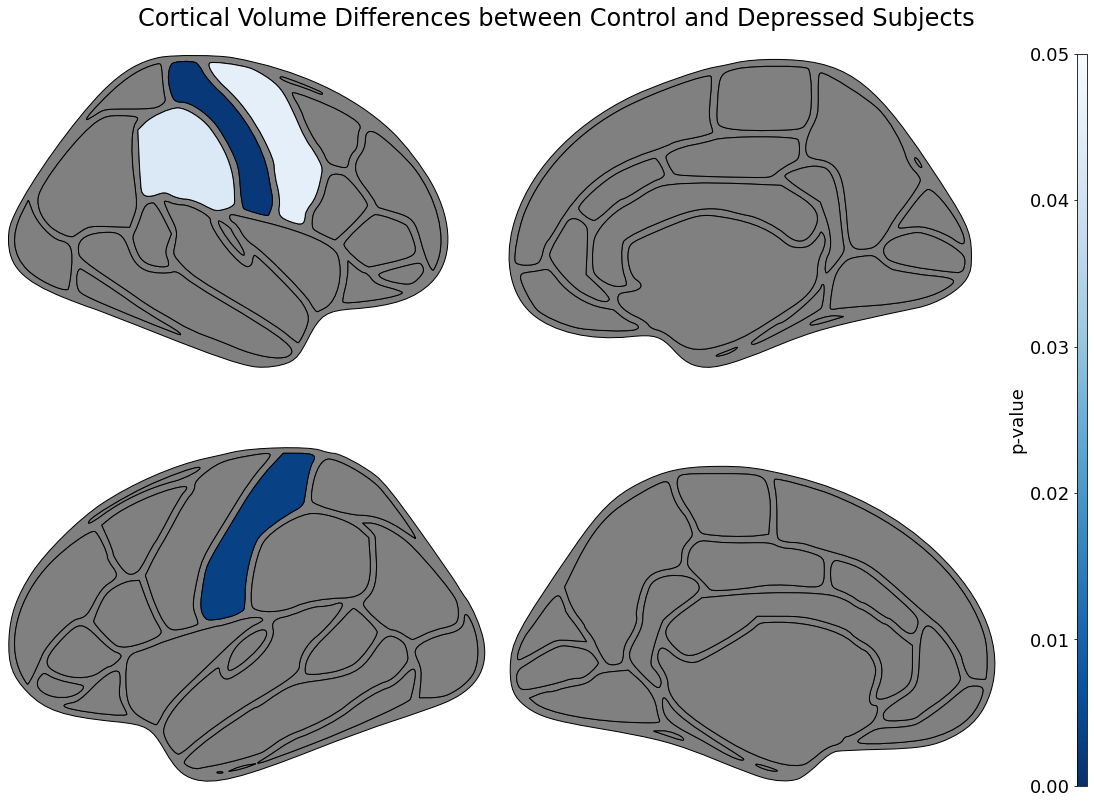

In [24]:
import ggseg

ggseg.plot_dk(
    data_qc,
    cmap="Blues_r",
    figsize=(15, 15),
    background="w",
    edgecolor="k",
    bordercolor="gray",
    ylabel="p-value",
    title="Cortical Volume Differences between Control and Depressed Subjects",
    vminmax=[0, 0.05],
    fontsize=24,
)

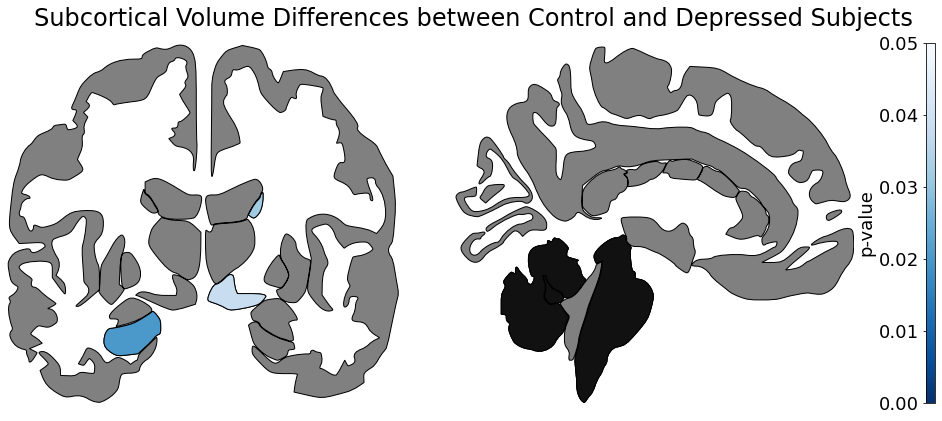

In [25]:
ggseg.plot_aseg(
    data_qc,
    cmap="Blues_r",
    background="w",
    edgecolor="k",
    bordercolor="gray",
    ylabel="p-value",
    title="Subcortical Volume Differences between Control and Depressed Subjects",
    vminmax=[0, 0.05],
    fontsize=24,
)

## ABCD depressed vs control

In [26]:
abcd = ABCD(synthseg.df.index)
abcd.df = abcd.match_synthseg_regions(synthseg.df)
abcd.df.shape

(1782, 101)

In [27]:
# Create overall df
abcd_with_labels = abcd.df.join(labels)

In [28]:
abcd_conditions = StatisticalAnalysis(
    abcd.df[abcd_with_labels["depress_dsm5"] == 0],
    abcd.df[abcd_with_labels["depress_dsm5"] == 1],
    ind=True,
)
abcd_sig_vols, abcd_all_stats = abcd_conditions.compare()

abcd_sig_vols

,feature,p_value
12,ctx-rh-postcentral,0.000346
6,ctx-lh-superiorparietal,0.000770
5,ctx-lh-postcentral,0.001783
0,ctx-lh-inferiorparietal,0.001919
16,ctx-rh-frontalpole,0.002564
2,ctx-lh-parahippocampal,0.002809
15,ctx-rh-supramarginal,0.002826
11,ctx-rh-paracentral,0.005236
13,ctx-rh-precentral,0.006550
8,ctx-rh-caudalanteriorcingulate,0.012916


# More data analysis

In [29]:
synthseg_qc_with_labels

,total intracranial,left cerebral white matter,left cerebral cortex,left lateral ventricle,left inferior lateral ventricle,left cerebellum white matter,left cerebellum cortex,left thalamus,left caudate,left putamen,...,ctx-rh-rostralmiddlefrontal,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-frontalpole,ctx-rh-temporalpole,ctx-rh-transversetemporal,ctx-rh-insula,depress_dsm5
subject,,,,,,,,,,,,,,,,,,,,,
NDARINVW2RNZLMD,1649660.4,264181.30,326792.25,11447.786,620.537,14525.023,63348.844,8752.133,4876.770,6250.810,...,15449.025,21065.236,13822.385,9706.300,11679.445,3933.964,3969.430,2548.986,7339.619,1
NDARINVW3GNFYF3,1392070.4,214965.12,286622.70,3504.918,394.959,13182.956,58945.152,7323.508,4209.031,5792.698,...,10879.962,17310.062,11100.900,8669.546,9428.856,3369.750,3189.750,2238.624,6210.324,0
NDARINVW49LW8G9,1433559.0,206686.62,301790.88,7910.316,466.657,13678.313,55604.188,7246.027,3282.903,5443.178,...,11954.674,16187.843,11657.706,8664.027,8399.713,3228.956,3175.755,2143.267,6007.952,0
NDARINVW5F6E0EE,1479697.5,222263.19,291813.10,5271.414,383.898,15399.612,67127.430,7627.134,4337.230,6028.418,...,13318.326,16277.017,12268.566,9825.352,10241.195,3185.318,3652.712,2167.815,6334.088,1
NDARINVW5LV1C4M,1438194.8,222185.92,310417.66,3761.936,363.790,12791.351,52488.168,7091.138,4334.090,5710.094,...,12508.715,17826.460,12478.840,7882.244,8790.291,3028.630,3453.509,2160.325,6119.584,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NDARINV14PNN5H9,1334776.4,202729.27,274414.90,7220.263,348.176,13914.187,59350.370,7137.309,4649.322,5401.115,...,12286.627,15499.191,10947.853,7225.369,8212.056,3233.010,2973.249,2021.662,5614.508,0
NDARINV19GEFHUC,1268219.5,183327.45,258512.00,3027.287,415.574,13598.274,58523.934,7339.033,3829.564,6183.138,...,10962.430,14458.245,9106.913,7314.708,8630.587,3041.230,3048.805,1931.826,5105.627,0
NDARINV1A1Y0V5X,1454486.0,223467.05,308454.50,3784.484,368.554,13623.069,55462.227,7061.070,3839.372,5815.781,...,11861.418,14931.503,11525.587,8700.787,9525.312,3346.874,3336.464,2073.469,5805.587,1


In [30]:
synthseg_with_labels

,total intracranial,left cerebral white matter,left cerebral cortex,left lateral ventricle,left inferior lateral ventricle,left cerebellum white matter,left cerebellum cortex,left thalamus,left caudate,left putamen,...,ctx-rh-rostralmiddlefrontal,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-frontalpole,ctx-rh-temporalpole,ctx-rh-transversetemporal,ctx-rh-insula,depress_dsm5
subject,,,,,,,,,,,,,,,,,,,,,
NDARINVW2RNZLMD,1649660.4,264181.30,326792.25,11447.786,620.537,14525.023,63348.844,8752.133,4876.770,6250.810,...,15449.025,21065.236,13822.385,9706.300,11679.445,3933.964,3969.430,2548.986,7339.619,1
NDARINVW3GNFYF3,1392070.4,214965.12,286622.70,3504.918,394.959,13182.956,58945.152,7323.508,4209.031,5792.698,...,10879.962,17310.062,11100.900,8669.546,9428.856,3369.750,3189.750,2238.624,6210.324,0
NDARINVW49LW8G9,1433559.0,206686.62,301790.88,7910.316,466.657,13678.313,55604.188,7246.027,3282.903,5443.178,...,11954.674,16187.843,11657.706,8664.027,8399.713,3228.956,3175.755,2143.267,6007.952,0
NDARINVW5F6E0EE,1479697.5,222263.19,291813.10,5271.414,383.898,15399.612,67127.430,7627.134,4337.230,6028.418,...,13318.326,16277.017,12268.566,9825.352,10241.195,3185.318,3652.712,2167.815,6334.088,1
NDARINVW5LV1C4M,1438194.8,222185.92,310417.66,3761.936,363.790,12791.351,52488.168,7091.138,4334.090,5710.094,...,12508.715,17826.460,12478.840,7882.244,8790.291,3028.630,3453.509,2160.325,6119.584,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NDARINV17UGGHGJ,1426056.8,213083.84,299662.94,2378.811,463.855,13504.221,59652.703,6825.936,3493.806,5814.599,...,12199.245,15256.049,10713.738,9529.059,9886.811,3210.261,3481.714,2147.387,5966.774,0
NDARINV19GEFHUC,1268219.5,183327.45,258512.00,3027.287,415.574,13598.274,58523.934,7339.033,3829.564,6183.138,...,10962.430,14458.245,9106.913,7314.708,8630.587,3041.230,3048.805,1931.826,5105.627,0
NDARINV1A1Y0V5X,1454486.0,223467.05,308454.50,3784.484,368.554,13623.069,55462.227,7061.070,3839.372,5815.781,...,11861.418,14931.503,11525.587,8700.787,9525.312,3346.874,3336.464,2073.469,5805.587,1


In [31]:
synthseg_sig_vols

,feature,p_value
4,ctx-rh-postcentral,0.003214
3,ctx-lh-postcentral,0.007333
6,ctx-rh-supramarginal,0.020202
2,right cerebellum white matter,0.027419
5,ctx-rh-precentral,0.029681
0,left caudate,0.034681
1,left hippocampus,0.048953


In [32]:
ss_df_sig = synthseg_with_labels[
    [
        "ctx-rh-postcentral",
        "ctx-lh-postcentral",
        "ctx-rh-supramarginal",
        "right cerebellum white matter",
        "ctx-rh-precentral",
        "left caudate",
        "left hippocampus",
        "depress_dsm5",
    ]
]

ss_df_sig

,ctx-rh-postcentral,ctx-lh-postcentral,ctx-rh-supramarginal,right cerebellum white matter,ctx-rh-precentral,left caudate,left hippocampus,depress_dsm5
subject,,,,,,,,
NDARINVW2RNZLMD,10257.780,9464.764,11679.445,13559.286,11883.107,4876.770,4353.258,1
NDARINVW3GNFYF3,7890.256,7532.777,9428.856,12775.083,9374.305,4209.031,3909.122,0
NDARINVW49LW8G9,8611.576,7576.558,8399.713,12405.003,10882.374,3282.903,3878.657,0
NDARINVW5F6E0EE,8162.738,7480.880,10241.195,14375.140,10086.627,4337.230,4050.780,1
NDARINVW5LV1C4M,8631.198,8816.967,8790.291,12327.155,10334.327,4334.090,4054.185,0
...,...,...,...,...,...,...,...,...
NDARINV17UGGHGJ,8742.031,8172.240,9886.811,12519.837,10671.034,3493.806,4149.416,0
NDARINV19GEFHUC,7253.023,7206.583,8630.587,12757.939,8880.903,3829.564,3918.018,0
NDARINV1A1Y0V5X,8232.510,8038.928,9525.312,12509.374,10915.221,3839.372,3902.337,1


In [33]:
ss_df_sig.rename(
    {
        "ctx-rh-postcentral": "postcentral (R)",
        "ctx-lh-postcentral": "postcentral (L)",
        "ctx-rh-supramarginal": "supramarginal (R)",
        "ctx-rh-precentral": "precentral (R)",
        "depress_dsm5": "Label",
    },
    axis=1,
    inplace=True,
)
ss_df_sig["Label"] = ss_df_sig["Label"].replace({1: "Depressed", 0: "Control"})
ss_df_sig

/usr/lib/python3/dist-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-33-f554efe6907b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss_df_sig["Label"] = ss_df_sig["Label"].replace({1: "Depressed", 0: "Control"})


,postcentral (R),postcentral (L),supramarginal (R),right cerebellum white matter,precentral (R),left caudate,left hippocampus,Label
subject,,,,,,,,
NDARINVW2RNZLMD,10257.780,9464.764,11679.445,13559.286,11883.107,4876.770,4353.258,Depressed
NDARINVW3GNFYF3,7890.256,7532.777,9428.856,12775.083,9374.305,4209.031,3909.122,Control
NDARINVW49LW8G9,8611.576,7576.558,8399.713,12405.003,10882.374,3282.903,3878.657,Control
NDARINVW5F6E0EE,8162.738,7480.880,10241.195,14375.140,10086.627,4337.230,4050.780,Depressed
NDARINVW5LV1C4M,8631.198,8816.967,8790.291,12327.155,10334.327,4334.090,4054.185,Control
...,...,...,...,...,...,...,...,...
NDARINV17UGGHGJ,8742.031,8172.240,9886.811,12519.837,10671.034,3493.806,4149.416,Control
NDARINV19GEFHUC,7253.023,7206.583,8630.587,12757.939,8880.903,3829.564,3918.018,Control
NDARINV1A1Y0V5X,8232.510,8038.928,9525.312,12509.374,10915.221,3839.372,3902.337,Depressed


(array([0.    , 0.0002, 0.0004, 0.0006, 0.0008, 0.001 ]),
 [Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, '')])

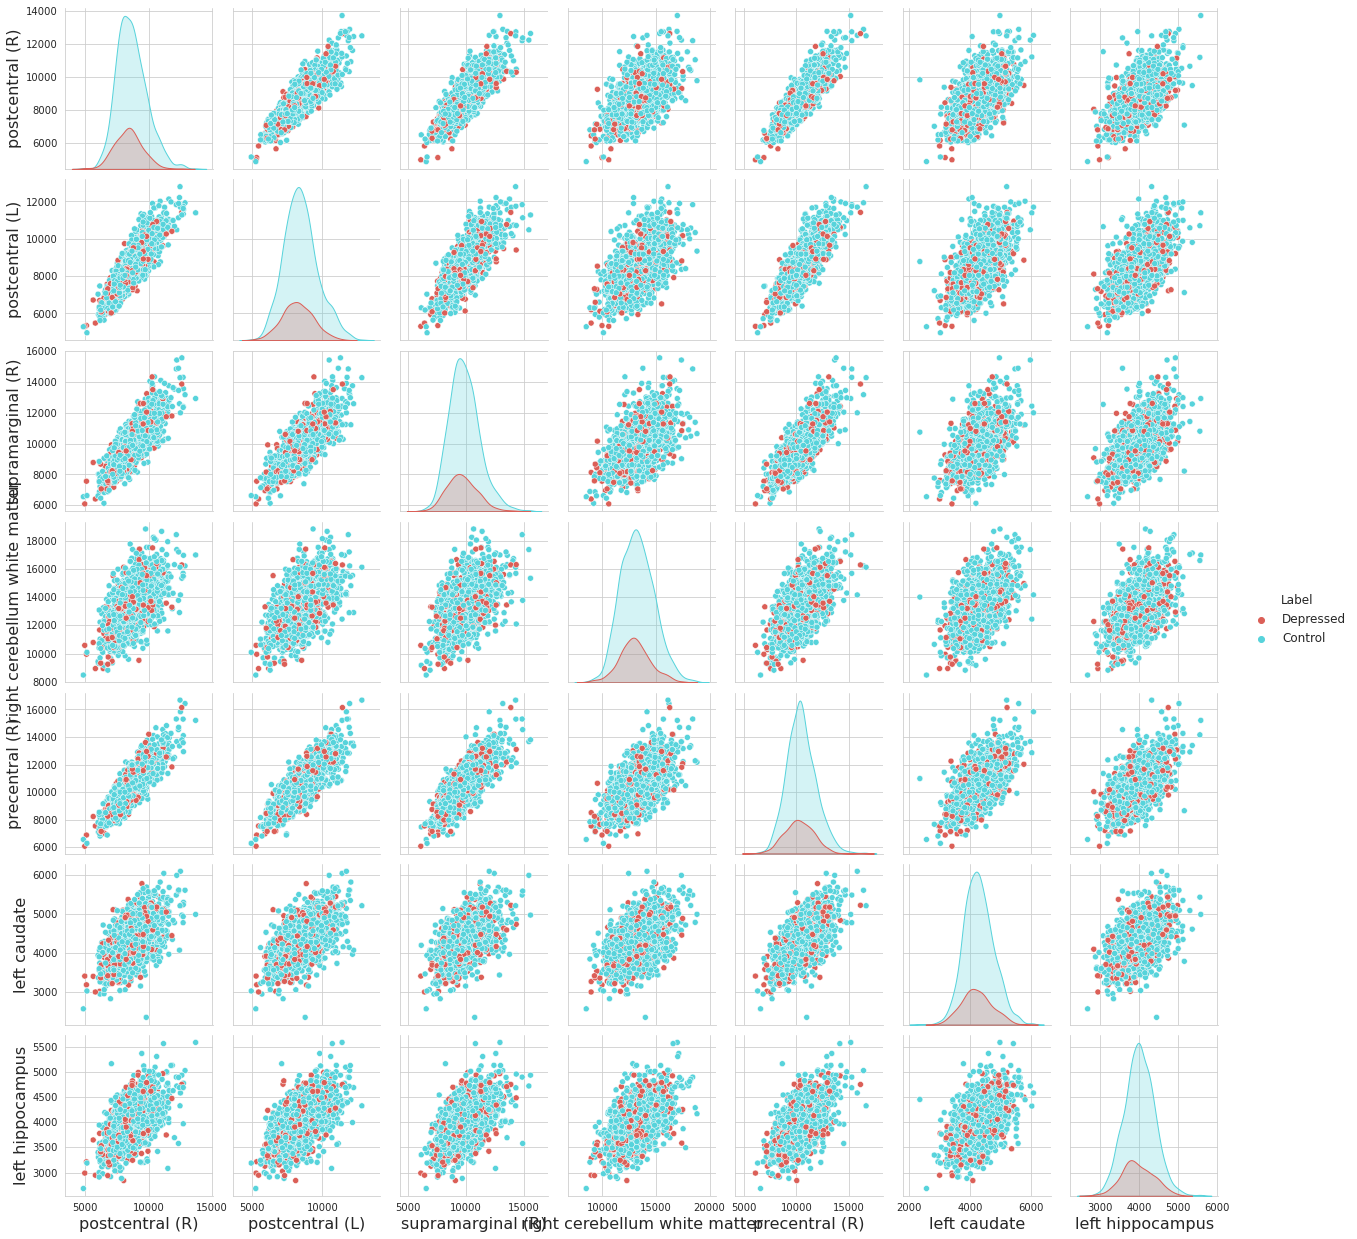

In [34]:
import seaborn as sns

sns.set_theme(
    context={
        "font.size": 10.0,
        "axes.labelsize": "16",
        "axes.titlesize": "large",
        "xtick.labelsize": "medium",
        "ytick.labelsize": "medium",
        "legend.fontsize": "large",
        "legend.title_fontsize": "large",
        "axes.linewidth": 0.8,
        "grid.linewidth": 0.8,
        "lines.linewidth": 1.5,
        "lines.markersize": 6.0,
        "patch.linewidth": 1.0,
        "xtick.major.width": 0.8,
        "ytick.major.width": 0.8,
        "xtick.minor.width": 0.6,
        "ytick.minor.width": 0.6,
        "xtick.major.size": 3.5,
        "ytick.major.size": 3.5,
        "xtick.minor.size": 2.0,
        "ytick.minor.size": 2.0,
    }
)
sns.set_style("whitegrid")
sns.pairplot(ss_df_sig, hue="Label", palette=sns.color_palette("hls", 2))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)